In [1]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

In [2]:
!pip install ipywidgets

!pip install chart_studio
import chart_studio.plotly as py
import numpy as np
from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import Contours, Histogram2dContour, Marker, Scatter

configure_plotly_browser_state()

init_notebook_mode(connected=False)


Output hidden; open in https://colab.research.google.com to view.

In [3]:
import time
import numpy as np

from skimage import io

In [4]:
vol = io.imread("https://s3.amazonaws.com/assets.datacamp.com/blog_assets/attention-mri.tif")
volume = vol.T
r,c = volume[0].shape

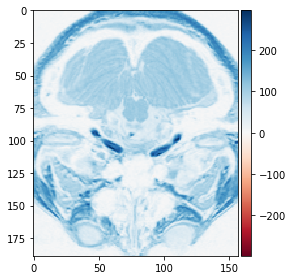

In [5]:
io.imshow(volume[0])

In [6]:
#define frames
import plotly.graph_objects as go
nb_frames = 68

In [7]:
r,c

(189, 157)

In [8]:
fig = go.Figure(frames = [go.Frame(data = go.Surface(
    z = (6.7 - k * 0.1) * np.ones((r,c)),
    surfacecolor = np.flipud(volume[67-k]),
    cmin = 0, cmax=200),
    name = str(k)
    )
    for k in range(nb_frames)])

In [ ]:
fig.add_trace(go.Surface(
    z = 6.7* np.ones((r,c)),
    surfacecolor = np.flipud(volume[67]),
    colorscale = 'Gray',
    cmin = 0, cmax=200,
    colorbar = dict(thickness=20, ticklen=4)
))

In [ ]:
def frame_args(duration):
  return {
      "frame": {"duration":duration},
      "mode": "immediate",
      "fromcurrent": True,
      "transition": {"duration":duration,"easing":"linear"},
  }

In [ ]:
sliders = [
           {
               "pad": {"b":10,"t":60},
            "len": 0.9,
            "x" : 0.1,
            "y":0,
            "steps": [
                      {
                          "args": [[f.name], frame_args(0)],
                          "label" : str(k),
                          "method" : "animate",
                      }
                      for k,f in enumerate(fig.frames)
            ],
           }

]

In [ ]:
#Layout
fig.update_layout(
    title = "Slices in volumetric data",
    width = 600,
    height = 600,
    scene = dict(
        zaxis = dict(range = [-0.1,6.8], autorange = False),
        aspectratio = dict(x=1,y=1,z=1)),
        updatemenus = [
                        {
                        "buttons": [
                                    {
                                        "args" : [None, frame_args(50)],
                                     "label" : "&#9654;",
                                     "method ": "animate",
                                    },
                                    {
                                        "args":[[None],frame_args(0)],
                                     "label":"&#9724;",
                                     "method":"animate"
                                     },           
                                    ],
                        "direction": "left",
                        "pad": {"r":10,"t":70},
                        "type": "buttons",
                        "x":0.1,
                        "y":0,
                        }
        ],
        sliders= sliders)

ValueError: ignored

In [ ]:
fig.update_layout(
         title='Slices in volumetric data',
         width=600,
         height=600,
         scene=dict(
                    zaxis=dict(range=[-0.1, 6.8], autorange=False),
                    aspectratio=dict(x=1, y=1, z=1),
                    ),
         updatemenus = [
            {
                "buttons": [
                    {
                        "args": [None, frame_args(50)],
                        "label": "&#9654;", # play symbol
                        "method": "animate",
                    },
                    {
                        "args": [[None], frame_args(0)],
                        "label": "&#9724;", # pause symbol
                        "method": "animate",
                    },
                ],
                "direction": "left",
                "pad": {"r": 10, "t": 70},
                "type": "buttons",
                "x": 0.1,
                "y": 0,
            }
         ],
         sliders=sliders
)
